# Inspect and preprocess data to anndata objects

In [ ]:
import os
import crested
from _train_val_split import split_by_chromosome_folds

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

print(crested.__version__)

In [ ]:
data_root = "../../../../../../../data/paper_zips/10x_hydropv2_comparisons_data/" # set data root to the unzipped folder's data location
bigwigs_root = f"{data_root}/bigwigs/"
experiment = "plus75cells_allreads"
k_folds = 10
genome_file = "../../../../../../../data/genomes/refdata-cellranger-arc-mm10-2020-A-2.0.0/fasta/genome.fa"
consensus_regions_file = f"{data_root}/consensus_regions_mouse_cleanup_annot_all_data_fulldepth.bed"

In [3]:
genome = crested.Genome(
    genome_file,
    name="mm10"
)
crested.register_genome(genome)

2025-06-28T16:18:53.517807+0200 INFO Genome mm10 registered.


## HydropV2

In [ ]:
bigwigs_folder = os.path.join(bigwigs_root, "hydrop_plus75cells_allreads")

In [5]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=consensus_regions_file,
    target_region_width=1000,  
    target="mean",  
)
adata

2025-06-28T16:19:13.479537+0200 INFO Extracting values from 16 bigWig files...


AnnData object with n_obs × n_vars = 16 × 808845
    obs: 'file_path'
    var: 'chr', 'start', 'end'

In [6]:
adata.obs_names = adata.obs_names.str.split("___").str[0]
adata.obs_names

Index(['Astro', 'Endo_VLMC', 'L2_3_IT', 'L5_6_NP', 'L5_ET', 'L5_IT', 'L6_CT',
       'L6_IT', 'L6b', 'Lamp5', 'Micro_PVM', 'OPC', 'Oligo', 'Pvalb',
       'Sncg_Vip', 'Sst'],
      dtype='object')

In [7]:
# add folds columns to adata.var
split_by_chromosome_folds(adata, k=k_folds)

In [8]:
adata.var

,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr1:3094286-3094786,chr1,3094286,3094786,val,train,train,train,train,train,train,train,train,train
chr1:3097001-3097501,chr1,3097001,3097501,val,train,train,train,train,train,train,train,train,train
chr1:3097804-3098304,chr1,3097804,3098304,val,train,train,train,train,train,train,train,train,train
chr1:3112437-3112937,chr1,3112437,3112937,val,train,train,train,train,train,train,train,train,train
chr1:3118739-3119239,chr1,3118739,3119239,val,train,train,train,train,train,train,train,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:1050180-1050680,chrY,1050180,1050680,val,train,train,train,train,train,train,train,train,train
chrY:872845-873345,chrY,872845,873345,train,val,train,train,train,train,train,train,train,train
chrY:1245537-1246037,chrY,1245537,1246037,train,train,val,train,train,train,train,train,train,train


In [9]:
adata.var['fold_0'].value_counts()

fold_0
train    727952
val       80893
Name: count, dtype: int64

In [10]:
adata.var[(adata.var['chr'] == 'chr1')]['fold_0'].value_counts()

fold_0
train    51777
val       5753
Name: count, dtype: int64

In [11]:
crested.pp.change_regions_width(
    adata,
    2114,
)

2025-06-28T16:20:56.867049+0200 WARNING Region chrM:-362-1752 with coordinates chrM:-362-1752 is out of bounds for chromosome chrM. Removing region.
2025-06-28T16:20:56.894557+0200 WARNING Region chrM:14601-16715 with coordinates chrM:14601-16715 is out of bounds for chromosome chrM. Removing region.


In [12]:
crested.pp.normalize_peaks(
    adata, top_k_percent=0.03
) 

2025-06-28T16:21:20.371255+0200 INFO Filtering on top k Gini scores...
2025-06-28T16:21:31.135282+0200 INFO Added normalization weights to adata.obsm['weights']...


,chr,start,end,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9
region,,,,,,,,,,,,,
chr19:24134125-24136239,chr19,24134125,24136239,train,train,train,train,train,val,train,train,train,train
chr8:13629041-13631155,chr8,13629041,13631155,train,train,train,train,train,train,train,val,train,train
chr8:15026408-15028522,chr8,15026408,15028522,train,train,train,train,train,train,train,val,train,train
chr19:24279344-24281458,chr19,24279344,24281458,train,train,train,train,train,val,train,train,train,train
chr8:25013966-25016080,chr8,25013966,25016080,train,train,train,train,train,train,train,val,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19:23141844-23143958,chr19,23141844,23143958,train,train,train,train,train,val,train,train,train,train
chr8:3219471-3221585,chr8,3219471,3221585,train,train,train,train,train,train,train,val,train,train
chr8:3674795-3676909,chr8,3674795,3676909,train,train,train,train,train,train,train,val,train,train


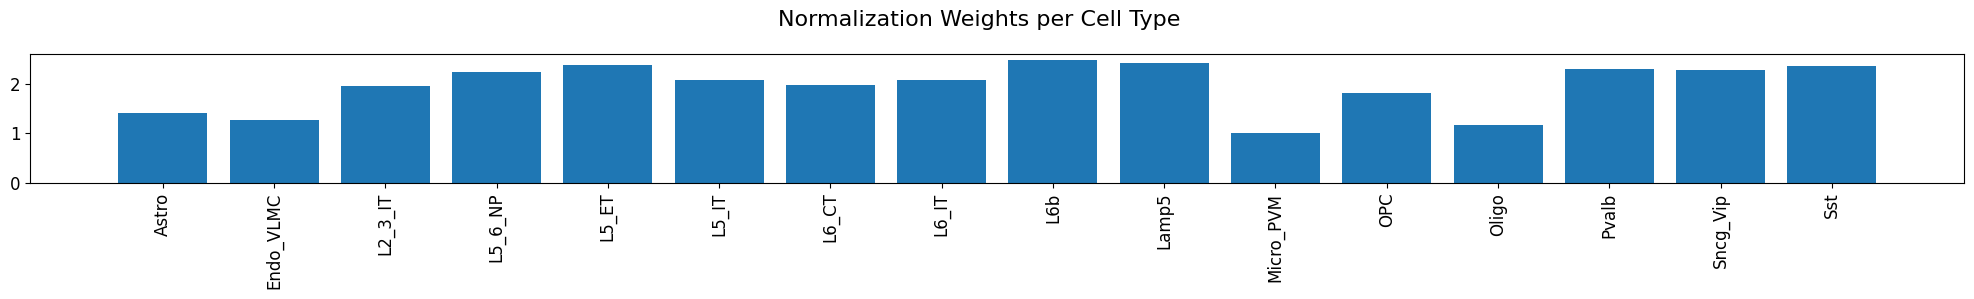

In [13]:
%matplotlib inline
crested.pl.bar.normalization_weights(
    adata, title="Normalization Weights per Cell Type", x_label_rotation=90
)

In [14]:
outdir = f"../data/{experiment}/Hydropv2/"
os.makedirs(outdir, exist_ok=True)
adata.write_h5ad(os.path.join(outdir, "normalized.h5ad"))

In [15]:
crested.pp.filter_regions_on_specificity(adata, gini_std_threshold=1.0)

2025-06-28T16:21:56.614547+0200 INFO After specificity filtering, kept 131379 out of 808843 regions.


In [16]:
adata.write_h5ad(os.path.join(outdir, "normalized_specific.h5ad"))

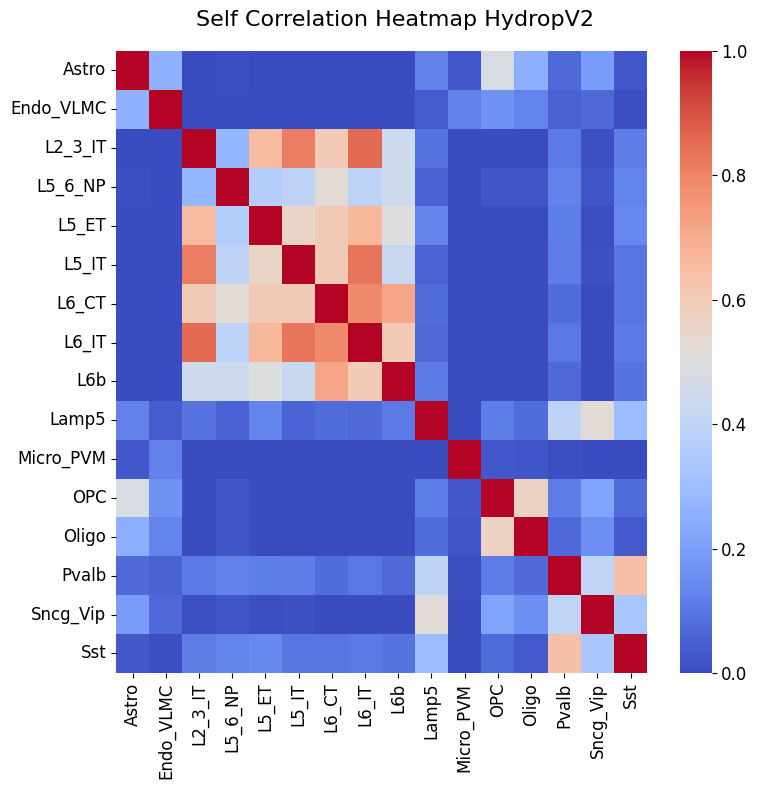

In [17]:
crested.pl.heatmap.correlations_self(
    adata,
    title="Self Correlation Heatmap HydropV2",
    x_label_rotation=90,
    width=8,
    height=8,
    vmax=1,
    log_transform=False,
    vmin=0.0,
)